# Analysis of Population Data of countries for years 1960-2014

### Libraries

In [1]:
# load the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import plotly
import plotly.plotly as py
py.sign_in('','')
import warnings
warnings.filterwarnings("ignore")

### Data Load

In [2]:
# load the data (Data Source: WorldBank {https://data.worldbank.org})

population = pd.read_csv("WorldPopulation_Total.csv",index_col=[0,1], header=2)
cols = []

# select required columns

for i in range(1960,2015):
    cols.append(str(i))

population = population[cols[:len(cols)]]
population = population.reset_index()

country_metadata = pd.read_csv("Metadata_Country.csv", header=0, usecols=['Country Code','Region','IncomeGroup'])
country_metadata = country_metadata.dropna()

### Data Preprocessing

In [3]:
# merge the population data with Country metadata to get only the countries and remove subgroups like Europe, Middle East etc

population_metadata_merged = population.merge(country_metadata,on=['Country Code'])
population_metadata_merged = population_metadata_merged.fillna(0)

In [4]:
# remove the unnecessary columns to get country and year wise population data

population_country = population_metadata_merged
population_country = population_country.set_index(['Country Name'])
population_country = population_country.drop(['Country Code','Region','IncomeGroup'], axis=1)
population_country.head()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
Country Name,,,,,,,,,,,,,,,,,,,,,
Aruba,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,57715.0,58055.0,58386.0,58726.0,...,100031.0,100832.0,101220.0,101353.0,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0
Afghanistan,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,10152331.0,10372630.0,10604346.0,10854428.0,...,25070798.0,25893450.0,26616792.0,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0
Angola,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,6309770.0,6414995.0,6523791.0,6642632.0,...,19552542.0,20262399.0,20997687.0,21759420.0,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0
Albania,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,1914573.0,1965598.0,2022272.0,2081695.0,...,3011487.0,2992547.0,2970017.0,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0
Andorra,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,19647.0,20758.0,21890.0,23058.0,...,78867.0,80991.0,82683.0,83861.0,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0


### Line Chart

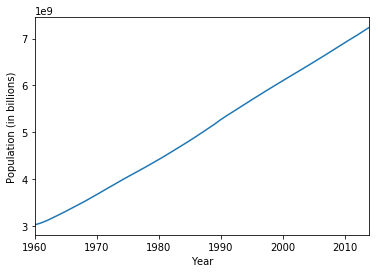

In [5]:
# plot population for the world for 1960-2014

ax = population_country.sum().plot()
ax.set_xlabel('Year')
ax.set_ylabel('Population (in billions)')
plt.show()

### Line Subplots

In [6]:
# for a given year, determine the most populated countries

def most_populated(year, top=5):
    df = population_country[year]
    df_sorted = df.sort_values(ascending=False)
    df_sorted = df_sorted.reset_index().head(top)
    df_sorted.index = df_sorted.index+1
    
    return df_sorted.round(2)

In [7]:
# function to draw subplots for most populated countries 1960-2014 

def subplots(topdf):
    
    # define the figure size
    plt.figure(figsize=(10, 20))
    
    # loop through dataframe to make subplots successively
    for i in range(len(topdf)):
        plt.subplot(len(topdf),2,i+1)
        ax =population_country.loc[topdf.loc[i,'Country Name']].plot()
    # add axis labels and title 
        ax.set_xlabel("Year")
        ax.set_ylabel("Population")
        plt.title(topdf.loc[i,'Country Name'])
    
    # define the layout and show the plot
    plt.tight_layout()
    plt.show()

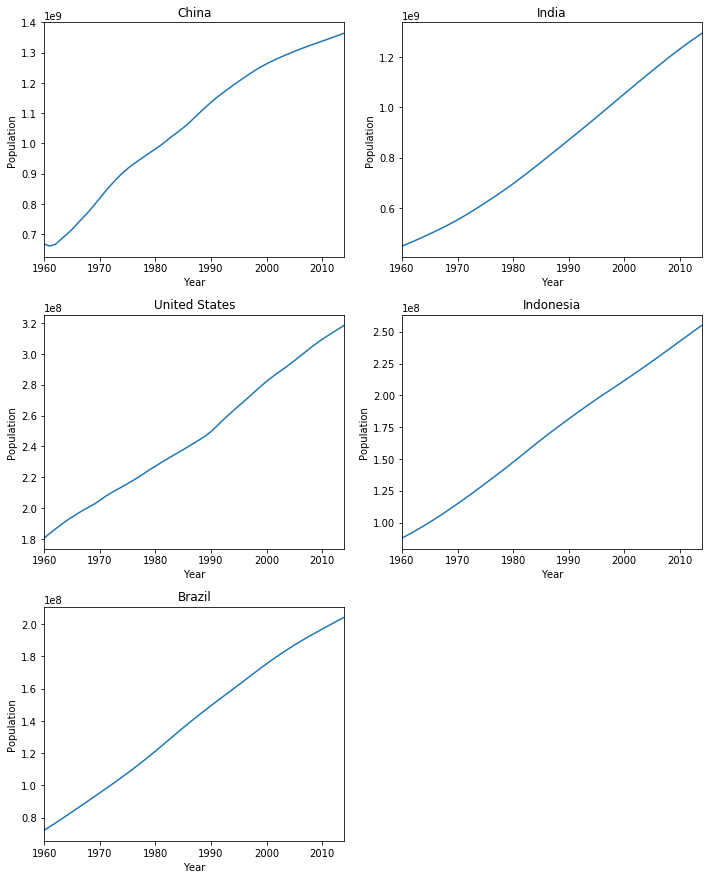

In [8]:
# draw subplots for 1960-2014 for most populated countries of a given year

subplots(most_populated('2010',5).reset_index(drop=True))

### Overlaying Plots

In [9]:
# function to draw multi-line plots for most populated contries 1960-2014

def multilineplot(topdf):
    
    # define the figure size
    plt.figure(figsize=(15, 10))
    
    # loop through dataframe to make plots overlying
    for i in range(len(topdf)):
        population_country.loc[topdf.loc[i,'Country Name']].plot()
           
    # add legends,axis labels and title
    plt.legend(loc='upper left')
    plt.xlabel('Year')
    plt.ylabel('Population (in billions)')
    plt.title('Comparative Chart of most populated countries ')
    
    plt.show()


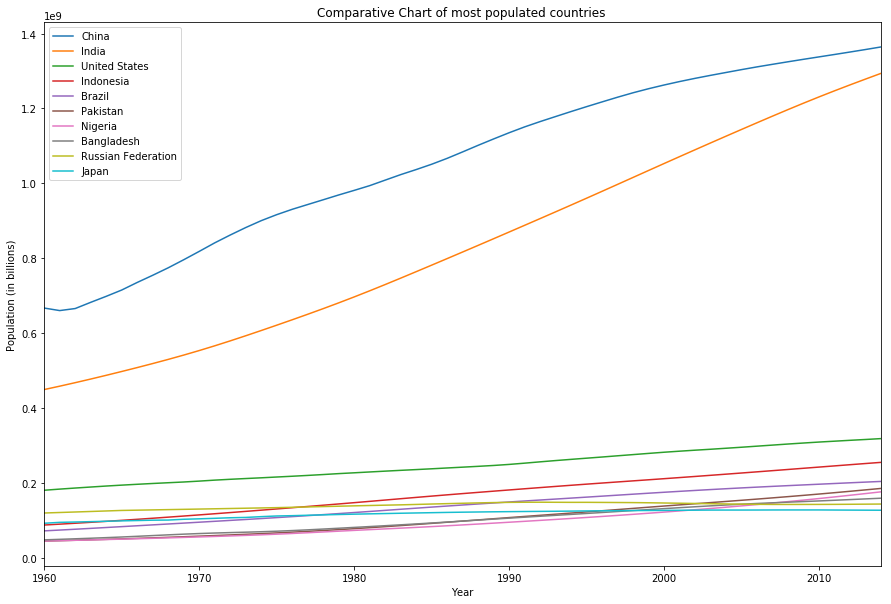

In [10]:
# draw overlying plots for 1960-2014 for most populated countries of a given year 

multilineplot(most_populated('2010',10).reset_index(drop=True))

### Pie Subplots

In [11]:
# function to draw multi-year pie charts for most populated countries

def multiyearpie(numyear=2):
    
    # define the figure size
    plt.figure(figsize=(10, 14))
    
    # get the total number of years
    total_years = len(population_country.columns)
    
    # loop through to make pie charts for given year successively
    for i in range(numyear):
        # draw as a subplot
        plt.subplot(numyear,2,i+1)
        
        # get the data for the particular year by subsetting the dataframe
        # get the name of the column as a list to be used as a year
        # convert the list to get the year as a string
        # sort the data frame in descending order
        df = population_country.iloc[:,total_years-(i+1):total_years-i]
        col = list(df)
        year = ''.join(col)
        df_sorted = df.sort_values(by=year,ascending=False)
        
        # reset the index of the sorted dataframe 
        # add one to the index
        # define other countries apart from top 10
        # save the data for 10 most populated countries
        df_sorted = df_sorted.reset_index()
        df_sorted.index = df_sorted.index+1
        others = df_sorted[10:].sum()[1]
        top = df_sorted[:10]
        top.loc[11] = ['All Other Countries', others]

        # define the pie chart with appropriate parameters
        ax = top[year].plot.pie(subplots=False,autopct='%0.1f',fontsize=12,legend=False,labels=top['Country Name'],
                                shadow=False,explode=(0.15,0.12,0.10,0,0,0,0,0,0,0,0),startangle=135)
        
        # add axis label and title
        ax.set_xlabel(year)
        ax.set_ylabel("")
        plt.title('Comparative Pie Chart of most populated countries ')


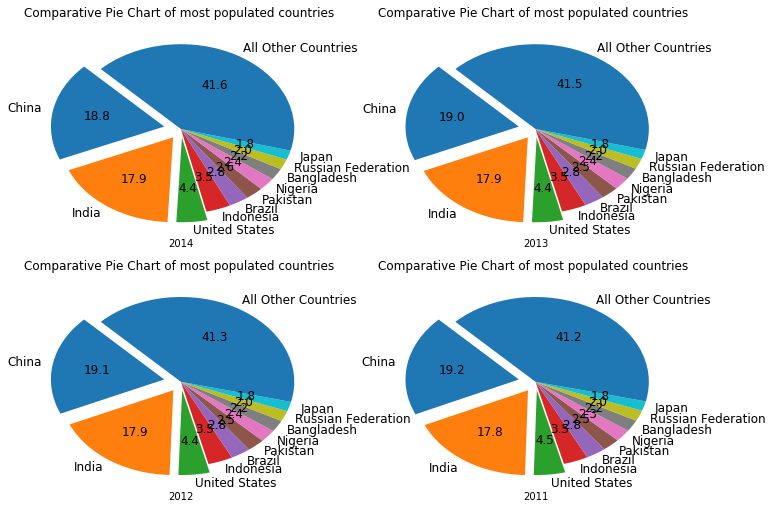

In [12]:
# draw pie chart for most populated countries for last five years

multiyearpie(4)
plt.tight_layout()

### World Map

In [13]:
# function to draw world map of most populated countries for a given year 

def worldmap(year):
    df = population_metadata_merged[['Country Name','Country Code',year]]
     
    data = [ dict(
            type = 'choropleth',
            locations = df['Country Code'],
            z = df[year],
            text = df['Country Name'],
            colorscale = [[0,"rgb(0, 0, 0)"],[0.35,"rgb(40, 40, 40)"],[0.5,"rgb(80, 80, 80)"],\
                [0.6,"rgb(120, 120, 120)"],[0.7,"rgb(180, 180, 180)"],[1,"rgb(250, 250, 250)"]],
            autocolorscale = False,
            reversescale = True,
            marker = dict(
                line = dict (
                    color = 'rgb(40,40,40)',
                    width = 0.5
                ) ),
            colorbar = dict(
                autotick = False,
                ticksuffix = '',
                title = 'Population <br>(in billions)'),
          ) ]

    layout = dict(
        title = ' Global Population - ' + year,
        geo = dict(
            showframe = False,
            showcoastlines = False,
            projection = dict(
                type = 'Mercator'
            )
        )
    )

    fig = dict( data=data, layout=layout )
    return fig

In [14]:
# draw world map for population of countries for 2014

fig = worldmap('2014')
py.iplot( fig, validate=False, filename='d3-world-map' )